In [1]:
import numpy as np
import matplotlib.pyplot as plt

import phystem.cpp_lib as cpp_lib


In [51]:
n = 40
size = 20
num_cols = 4
num_rows = num_cols

pos = np.random.random((n, 2))*size - size/2
pos = cpp_lib.data_types.PosVec(pos)

wm = cpp_lib.managers.WindowsManager(pos, num_cols, num_cols, size)

correct_neighbors = {tuple(key): [] for key in wm.windows_ids}
id_moves = ((1, 0), (0, 1), (1, 1), (-1, 0), (0, -1),
    (-1, -1), (1, -1), (-1, 1))
for id in wm.windows_ids:
    id = tuple(id)

    for move in id_moves:
        row_id = (id[0] + move[0])%num_rows
        col_id = (id[1] + move[1])%num_cols
        correct_neighbors[id].append([row_id, col_id])

test_neighbors = {tuple(key): [] for key in wm.windows_ids}
for win_id in wm.windows_ids:
    for neighbor_id in wm.window_neighbor[win_id[0]][win_id[1]]:
        test_neighbors[tuple(win_id)].append(neighbor_id)
        test_neighbors[tuple(neighbor_id)].append(win_id)
    
for win_id, neighbors in correct_neighbors.items():
    if len(neighbors) != 8:
        print(f"Erro tamanho: win_id: {win_id} | len: {len(neighbors)}")
    
    for neighbor_id in neighbors:
        num_equal = 0
        for other_id in neighbors:
            if other_id == neighbor_id:
                num_equal += 1
            
        if num_equal != 1:
            print(f"Erro duplicados: win_id: {win_id}")
    
    all_correct = True
    for correct_id in correct_neighbors[win_id]:
        if correct_id not in neighbors:
            print(f"Erro miss id: miss_id: {correct_id}")

In [4]:
n = 100
size = 10
dt = 0.05

self_prop_cfg = cpp_lib.configs.SelfPropellingCfg({
    "mobility": 1, 
    "relaxation_time": 1,
    "vo": 1,
    "max_attractive_force": 1,
    "max_repulsive_force": 1,
    "r_eq": 5/6,
    "max_r": 1,
    "nabla": -1,
})

pos = np.arange(2*n).reshape(2, -1).T
vel = -1 * np.arange(n*4).reshape(2, -1).T


np.random.seed(1234)
pos = (np.random.random((n, 2)) * 2 - 1) * size / 2
vel = (np.random.random((n, 2)) * 2 - 1)
# vo, ro, nabla, alpha, size, dt = 1, 1, 1, 1, 1, 1

posv = cpp_lib.data_types.PosVec(pos)
velv = cpp_lib.data_types.PosVec(vel)

# posv[1][0] = 10
# posv[1][0]

s = cpp_lib.solvers.SelfPropelling(posv, velv, self_prop_cfg, size, dt, 5, 1234)
# s2 = cpp_lib.Solver(posv, velv, self_prop_cfg, size, dt, 5, 1234)

# print("seed:", s.rng_seed)
print("angle:", s.propelling_angle[3])

angle: 3.095201307879575


In [3]:
list1 = [[], []]
for i in range(1000):
    s.update_self_propelling()
    # s.update_self_propelling_windows()

    m1 = np.array(list(s.sum_forces_matrix_debug))

    list1[0].append(m1)
    list1[1].append(s.rng_manager.random_nums)

In [4]:
list2 = [[], []]
for i in range(1000):
    # s.update_self_propelling()
    s.update_self_propelling_windows()

    m1 = np.array(list(s.sum_forces_matrix_debug))

    list2[0].append(m1)
    list2[1].append(s.rng_manager.random_nums)

False


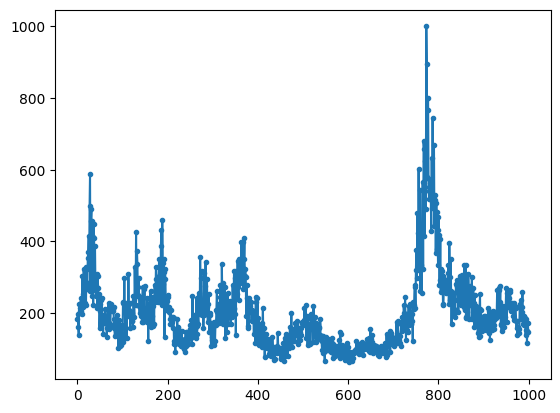

In [5]:
error_list = []
rng_test = []

print((np.array(list1[1]) == np.array(list2[1])).all())

for m1, m2 in zip(list1[0], list2[0]):
    error_list.append(((m1-m2)**2).sum())

plt.plot(error_list, ".-")

In [31]:
print(s.rng_manager.random_nums[1]) 
print(s2.rng_manager.random_nums[1])

1405415532
1369504499


In [24]:
# m1 = np.array(list(s.sum_forces_matrix_debug))
# m2 = np.array(list(s2.sum_forces_matrix_debug))
m1 = np.array(list(s.pos))
m2 = np.array(list(s2.pos))

((m1-m2)**2).sum()

# for f1, f2 in zip(m1, m2):
#     if not (f1 == f2).all():
#         print(f1[0] - f2[0])
#         print(f1)
#         print(f2)
#         print("=======")

# id = 10
# print(m1[id])
# print(m2[id])
# print((m2[id] == m2[id]).all())

# (m1 == m2).all()
# print(((m1 - m2)**2).sum())
# s.sum_forces_matrix_debug[0] == s2.sum_forces_matrix_debug[0]

100.0892372082567

In [70]:
# posv
s.update_self_propelling()
# print(p_angle[0])
# print(s.propelling_angle[0])

In [71]:
data = np.zeros((3, n), dtype=np.float64)
def save_test():
    data[0] = s.propelling_angle

data = np.zeros((3, 2, n), dtype=np.float64)
# data = np.zeros((3, n, 2), dtype=np.float64)
py_pos = s.py_pos
def vec_list_test():
    # data[0] = np.array(s.pos).T
    data[0] = py_pos
    # data[0] = s.pos


class WrapperSolver:
    def __init__(self, cpp_solver: cpp_lib.Solver) -> None:
        self.cpp_solcer = cpp_solver
    
    @property
    def pos(self):
        return self.cpp_solcer.py_pos

data = np.zeros((3, 2, n), dtype=np.float64)
wrapper_sol = WrapperSolver(s)
def wrapper_access():
    data[0] = wrapper_sol.pos 
    # data[0] = s.py_pos 


%timeit wrapper_access()

27.3 µs ± 6.13 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
